In [1]:
#Data preparation
#create a class to handle data processing
import csv
from pymongo import MongoClient

class User:
    def __init__(self, db_name, collection_name):
        self.client = MongoClient("mongodb://localhost:27017/:5000")
        self.db = self.client[db_name]
        self.collection = self.db[collection_name]

    def export_to_csv(self, file_name):    #loops through the MongoDB data
        data = self.collection.find()
        with open(file_name, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Age", "Gender", "Total Income", "Utilities", "Entertainment", "School Fees", "Shopping", "Healthcare"])
            for entry in data:
                writer.writerow([entry["Age"], entry["Gender"], entry["Total Income"], 
                                 entry["Expenses"]["Utilities"], entry["Expenses"]["Entertainment"], 
                                 entry["Expenses"]["School Fees"], entry["Expenses"]["Shopping"], 
                                 entry["Expenses"]["Healthcare"]])

#store data in csv
user = User("surveys_data", "responses")
user.export_to_csv("surveys_data.csv")

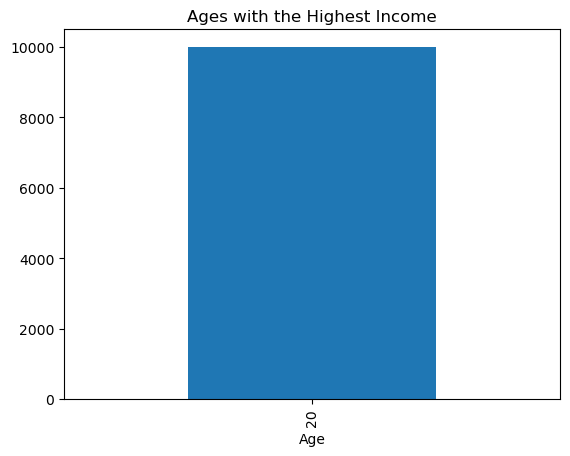

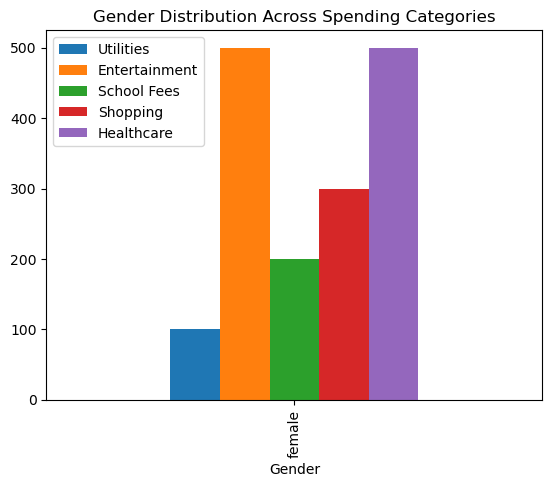

In [2]:
#Create a data visualization
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey_data.csv')

# Visualization 1: Ages with the highest income
df.groupby('Age')['Total Income'].max().plot(kind='bar')
plt.title('Ages with the Highest Income')
plt.show()

# Visualization 2: Gender distribution across spending categories
df.groupby('Gender').sum().plot(kind='bar', y=['Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare'])
plt.title('Gender Distribution Across Spending Categories')
plt.show()